# **1. Perkenalan Dataset**


# Perkenalan Dataset: Remote Worker Productivity Dataset

## Gambaran Umum Dataset

Dataset **Remote Worker Productivity** merupakan kumpulan data yang dikembangkan khusus untuk mendukung penelitian mengenai peran Kecerdasan Buatan (AI) dan Machine Learning (ML) dalam meningkatkan produktivitas pekerja jarak jauh. Dataset ini mensimulasikan data perilaku, performa, dan penggunaan teknologi dari karyawan yang bekerja secara remote di berbagai lokasi geografis—kota, kota kecil, dan desa—serta dalam berbagai sektor industri.

## Sumber Dataset

**Sumber:** Kaggle - Remote Worker Productivity Dataset  
**URL:** https://www.kaggle.com/datasets/ziya07/remote-worker-productivity-dataset  
**Penyedia:** Ziya07  
**Jenis Data:** Dataset simulasi dengan representasi yang realistis dari kondisi kerja remote

## Karakteristik Utama Dataset

Dataset ini mencakup informasi demografis, pola kerja harian, penggunaan alat bantu AI, metrik penyelesaian tugas, dan skor produktivitas yang telah dihitung. Variabel target (`productivity_label`) mengkategorikan produktivitas ke dalam tiga kelas: Tinggi (High), Sedang (Medium), dan Rendah (Low).

### Fitur-Fitur Unggulan:

1. **Keberagaman Geografis**: Data simulasi dari pekerja remote di daerah perkotaan, semi-perkotaan, dan pedesaan
2. **Cakupan Multi-Industri**: Meliputi sektor IT, Kesehatan, Pendidikan, Keuangan, dan Ritel
3. **Metrik Penggunaan AI/ML**: Melacak frekuensi penggunaan dan dampak dari alat-alat cerdas
4. **Indikator Manajemen Waktu**: Jam kerja, penjadwalan tugas, pola istirahat
5. **Variabel Target**: `productivity_label` dengan kategori High, Medium, Low



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
#Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("Library berhasil diimport!")
print("TensorFlow version:", tf.__version__)

Library berhasil diimport!
TensorFlow version: 2.18.0


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Load dataset
df = pd.read_csv('remote_worker_productivity_raw.csv')

print("INFORMASI DASAR DATASET")
print("="*60)

# Menampilkan bentuk dataset
print(f"Bentuk Dataset: {df.shape}")
print(f"   - Jumlah baris : {df.shape[0]}")
print(f"   - Jumlah kolom : {df.shape[1]}")

print(f"\nTipe Data:")
print(df.dtypes)

print(f"\n5 Baris Pertama Dataset:")
print(df.head())

INFORMASI DASAR DATASET
Bentuk Dataset: (1000, 17)
   - Jumlah baris : 1000
   - Jumlah kolom : 17

Tipe Data:
worker_id                    object
location_type                object
industry_sector              object
age                           int64
experience_years              int64
average_daily_work_hours    float64
break_frequency_per_day       int64
task_completion_rate        float64
late_task_ratio             float64
calendar_scheduled_usage    float64
focus_time_minutes          float64
tool_usage_frequency          int64
automated_task_count          int64
AI_assisted_planning          int64
real_time_feedback_score      int64
productivity_label           object
productivity_score          float64
dtype: object

5 Baris Pertama Dataset:
  worker_id location_type industry_sector  age  experience_years  \
0     W0001       Village      Healthcare   23                26   
1     W0002          City      Healthcare   27                27   
2     W0003       Village        

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Cek Struktur Data**

print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# CEK STRUKTUR DATA
print("STRUKTUR DATA:")
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nInfo Dataset:")
df.info()

print("\nStatistik Deskriptif:")
print(df.describe())

EXPLORATORY DATA ANALYSIS (EDA)
STRUKTUR DATA:
Dataset shape: (1000, 17)
Memory usage: 0.34 MB

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   worker_id                 1000 non-null   object 
 1   location_type             1000 non-null   object 
 2   industry_sector           1000 non-null   object 
 3   age                       1000 non-null   int64  
 4   experience_years          1000 non-null   int64  
 5   average_daily_work_hours  1000 non-null   float64
 6   break_frequency_per_day   1000 non-null   int64  
 7   task_completion_rate      1000 non-null   float64
 8   late_task_ratio           1000 non-null   float64
 9   calendar_scheduled_usage  1000 non-null   float64
 10  focus_time_minutes        1000 non-null   float64
 11  tool_usage_frequency      1000 non-null   int64  
 12  automated

In [ ]:
# CEK NILAI KOSONG (Missing Values)
print("CEK DAN TINDAK NILAI KOSONG:")
print(f"\nNilai yang Hilang:")
missing_values = df.isnull().sum()
print(missing_values)

missing_before = df.isnull().sum().sum()
print(f"Total missing values sebelum: {missing_before}")

if missing_before > 0:
    print("Missing values per kolom:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    df = df.dropna()
    print(f"Missing values dihapus! Dataset shape sekarang: {df.shape}")
else:
    print("Tidak ada missing values yang perlu dihapus")

CEK DAN TINDAK NILAI KOSONG:

Nilai yang Hilang:
worker_id                   0
location_type               0
industry_sector             0
age                         0
experience_years            0
average_daily_work_hours    0
break_frequency_per_day     0
task_completion_rate        0
late_task_ratio             0
calendar_scheduled_usage    0
focus_time_minutes          0
tool_usage_frequency        0
automated_task_count        0
AI_assisted_planning        0
real_time_feedback_score    0
productivity_label          0
productivity_score          0
dtype: int64
Total missing values sebelum: 0
Tidak ada missing values yang perlu dihapus


In [ ]:
# CEK NILAI DUPLIKAT
print("CEK DAN TINDAK NILAI DUPLIKAT:")
duplicates_before = df.duplicated().sum()
print(f"Total duplikat sebelum: {duplicates_before}")

if duplicates_before > 0:
    print("Contoh data duplikat:")
    print(df[df.duplicated()].head())
    df = df.drop_duplicates()
    print(f"Duplikat dihapus! Dataset shape sekarang: {df.shape}")
else:
    print("Tidak ada duplikat yang perlu dihapus")

print(f"\nDataset final shape: {df.shape}")

CEK DAN TINDAK NILAI DUPLIKAT:
Total duplikat sebelum: 0
Tidak ada duplikat yang perlu dihapus

Dataset final shape: (1000, 17)


In [ ]:
# CEK DISTRIBUSI LABEL (productivity_label)
print("DISTRIBUSI LABEL (productivity_label):")
label_dist = df['productivity_label'].value_counts()
print(label_dist)
print(f"\nPersentase distribusi:")
label_percent = (df['productivity_label'].value_counts(normalize=True) * 100).round(2)
print(label_percent)

# Cek keseimbangan dataset
print(f"\nAnalisis keseimbangan dataset:")
min_class = label_percent.min()
max_class = label_percent.max()
print(f"Kelas minoritas: {min_class}%")
print(f"Kelas mayoritas: {max_class}%")
print(f"Rasio imbalance: {max_class/min_class:.2f}:1")

DISTRIBUSI LABEL (productivity_label):
productivity_label
Low       334
Medium    333
High      333
Name: count, dtype: int64

Persentase distribusi:
productivity_label
Low       33.4
Medium    33.3
High      33.3
Name: proportion, dtype: float64

Analisis keseimbangan dataset:
Kelas minoritas: 33.3%
Kelas mayoritas: 33.4%
Rasio imbalance: 1.00:1


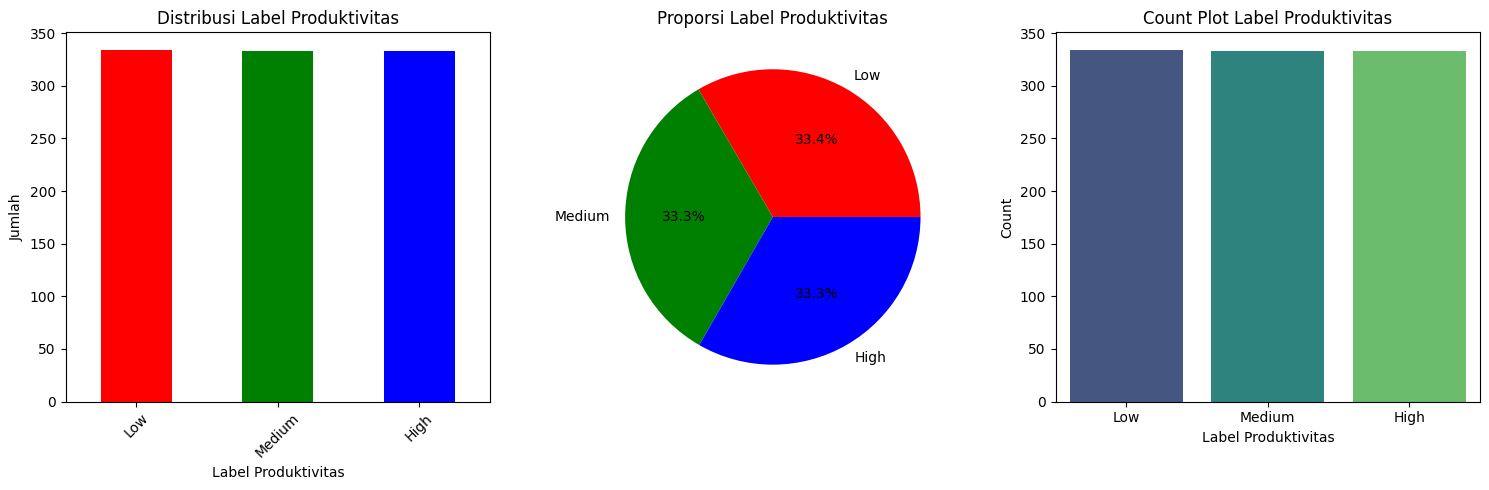

In [ ]:
# Visualisasi distribusi label
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['productivity_label'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribusi Label Produktivitas')
plt.xlabel('Label Produktivitas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df['productivity_label'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                                           colors=['red', 'green', 'blue'])
plt.title('Proporsi Label Produktivitas')
plt.ylabel('')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='productivity_label', palette='viridis')
plt.title('Count Plot Label Produktivitas')
plt.xlabel('Label Produktivitas')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# IDENTIFIKASI FITUR NUMERIK
print("IDENTIFIKASI FITUR NUMERIK:")
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Fitur numerik asli: {numeric_features}")

# Hapus productivity_score karena akan dihapus dalam preprocessing
numeric_features = [col for col in numeric_features if col != 'productivity_score']
print(f"Fitur numerik untuk analisis: {numeric_features}")
print(f"Jumlah fitur numerik: {len(numeric_features)}")

# Identifikasi fitur kategorik
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nFitur kategorik: {categorical_features}")
print(f"Jumlah fitur kategorik: {len(categorical_features)}")

IDENTIFIKASI FITUR NUMERIK:
Fitur numerik asli: ['age', 'experience_years', 'average_daily_work_hours', 'break_frequency_per_day', 'task_completion_rate', 'late_task_ratio', 'calendar_scheduled_usage', 'focus_time_minutes', 'tool_usage_frequency', 'automated_task_count', 'AI_assisted_planning', 'real_time_feedback_score', 'productivity_score']
Fitur numerik untuk analisis: ['age', 'experience_years', 'average_daily_work_hours', 'break_frequency_per_day', 'task_completion_rate', 'late_task_ratio', 'calendar_scheduled_usage', 'focus_time_minutes', 'tool_usage_frequency', 'automated_task_count', 'AI_assisted_planning', 'real_time_feedback_score']
Jumlah fitur numerik: 12

Fitur kategorik: ['worker_id', 'location_type', 'industry_sector', 'productivity_label']
Jumlah fitur kategorik: 4


VISUALISASI DISTRIBUSI FITUR NUMERIK:


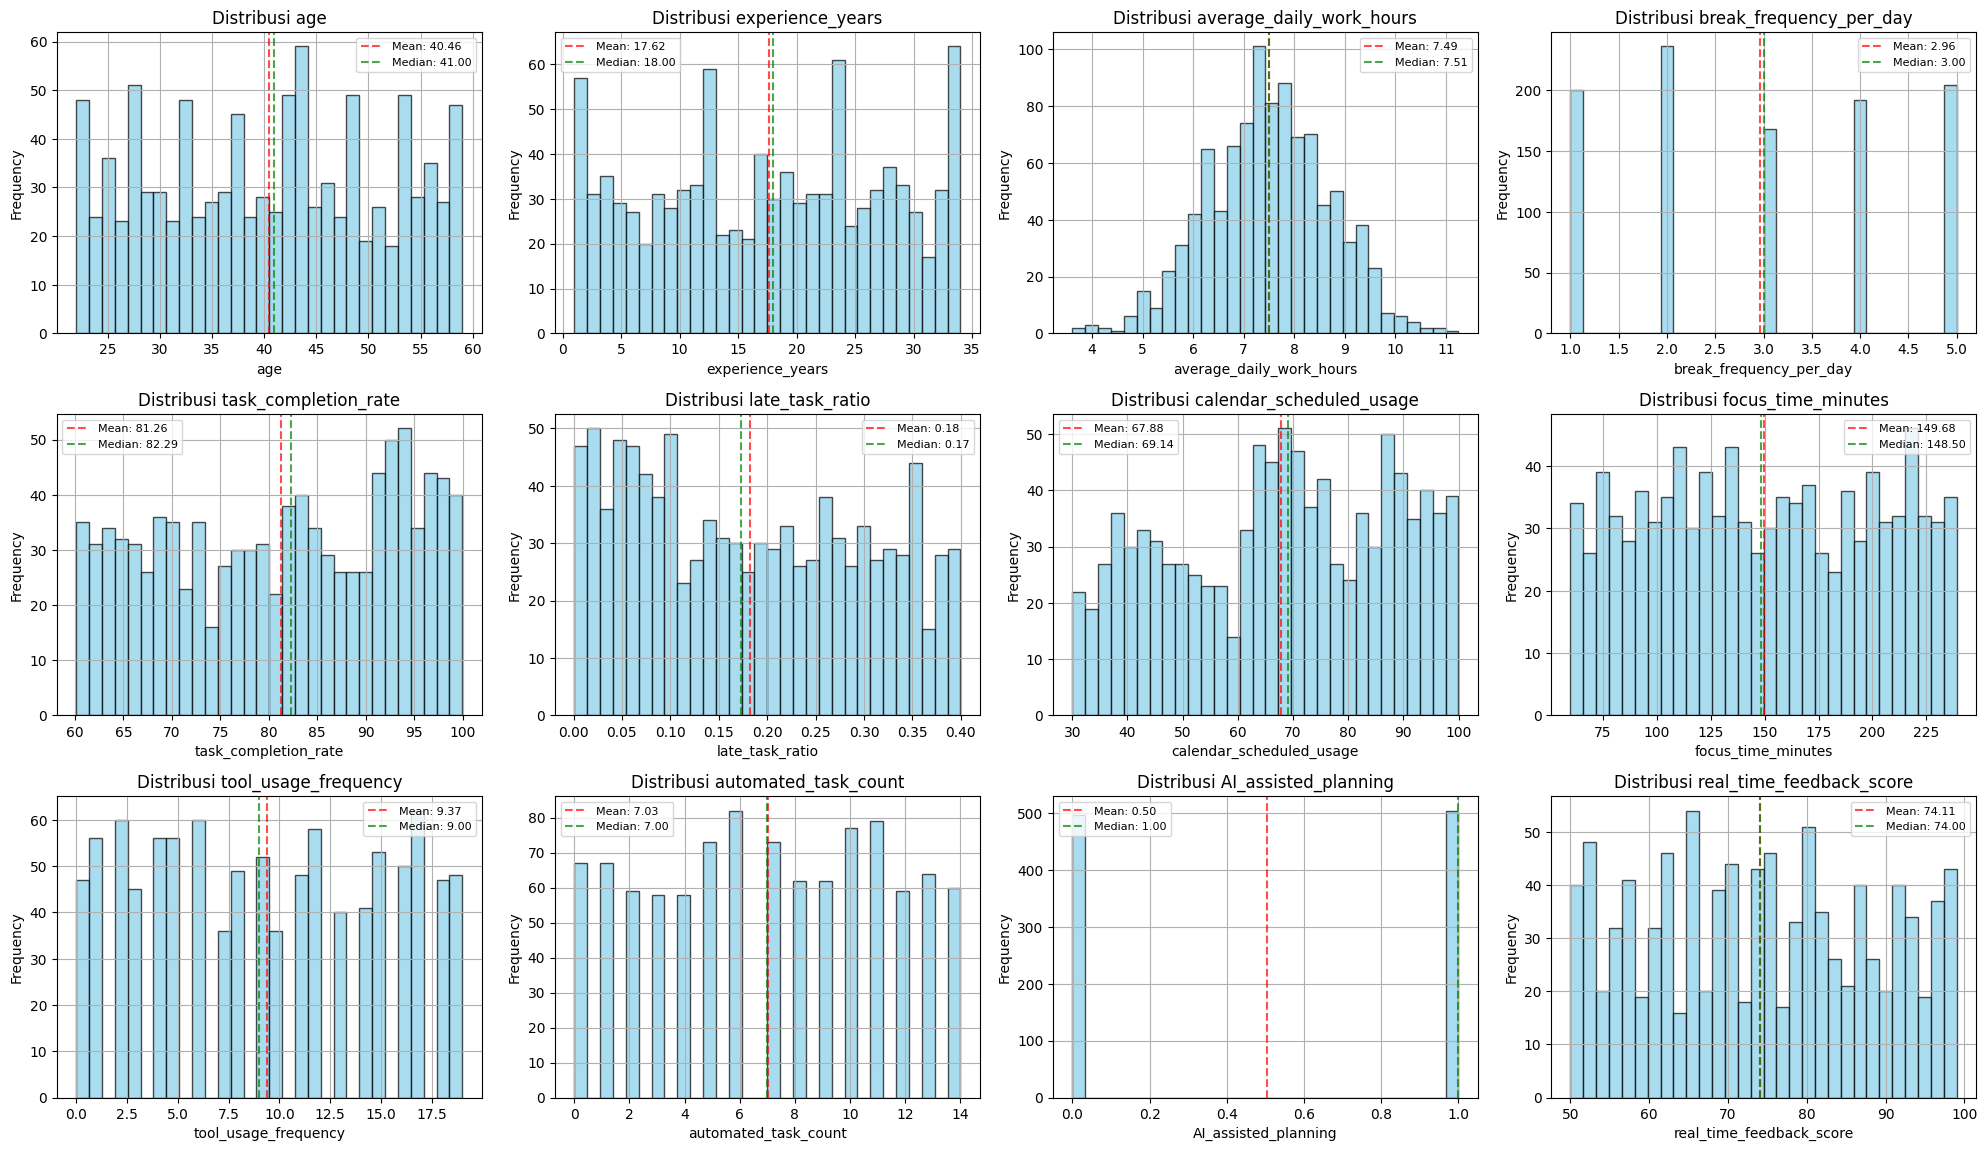

In [ ]:
# VISUALISASI FITUR NUMERIK - HISTOGRAM
print("VISUALISASI DISTRIBUSI FITUR NUMERIK:")

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    df[feature].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # Tambahkan statistik
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    plt.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

BOXPLOT FITUR NUMERIK (Deteksi Outliers):


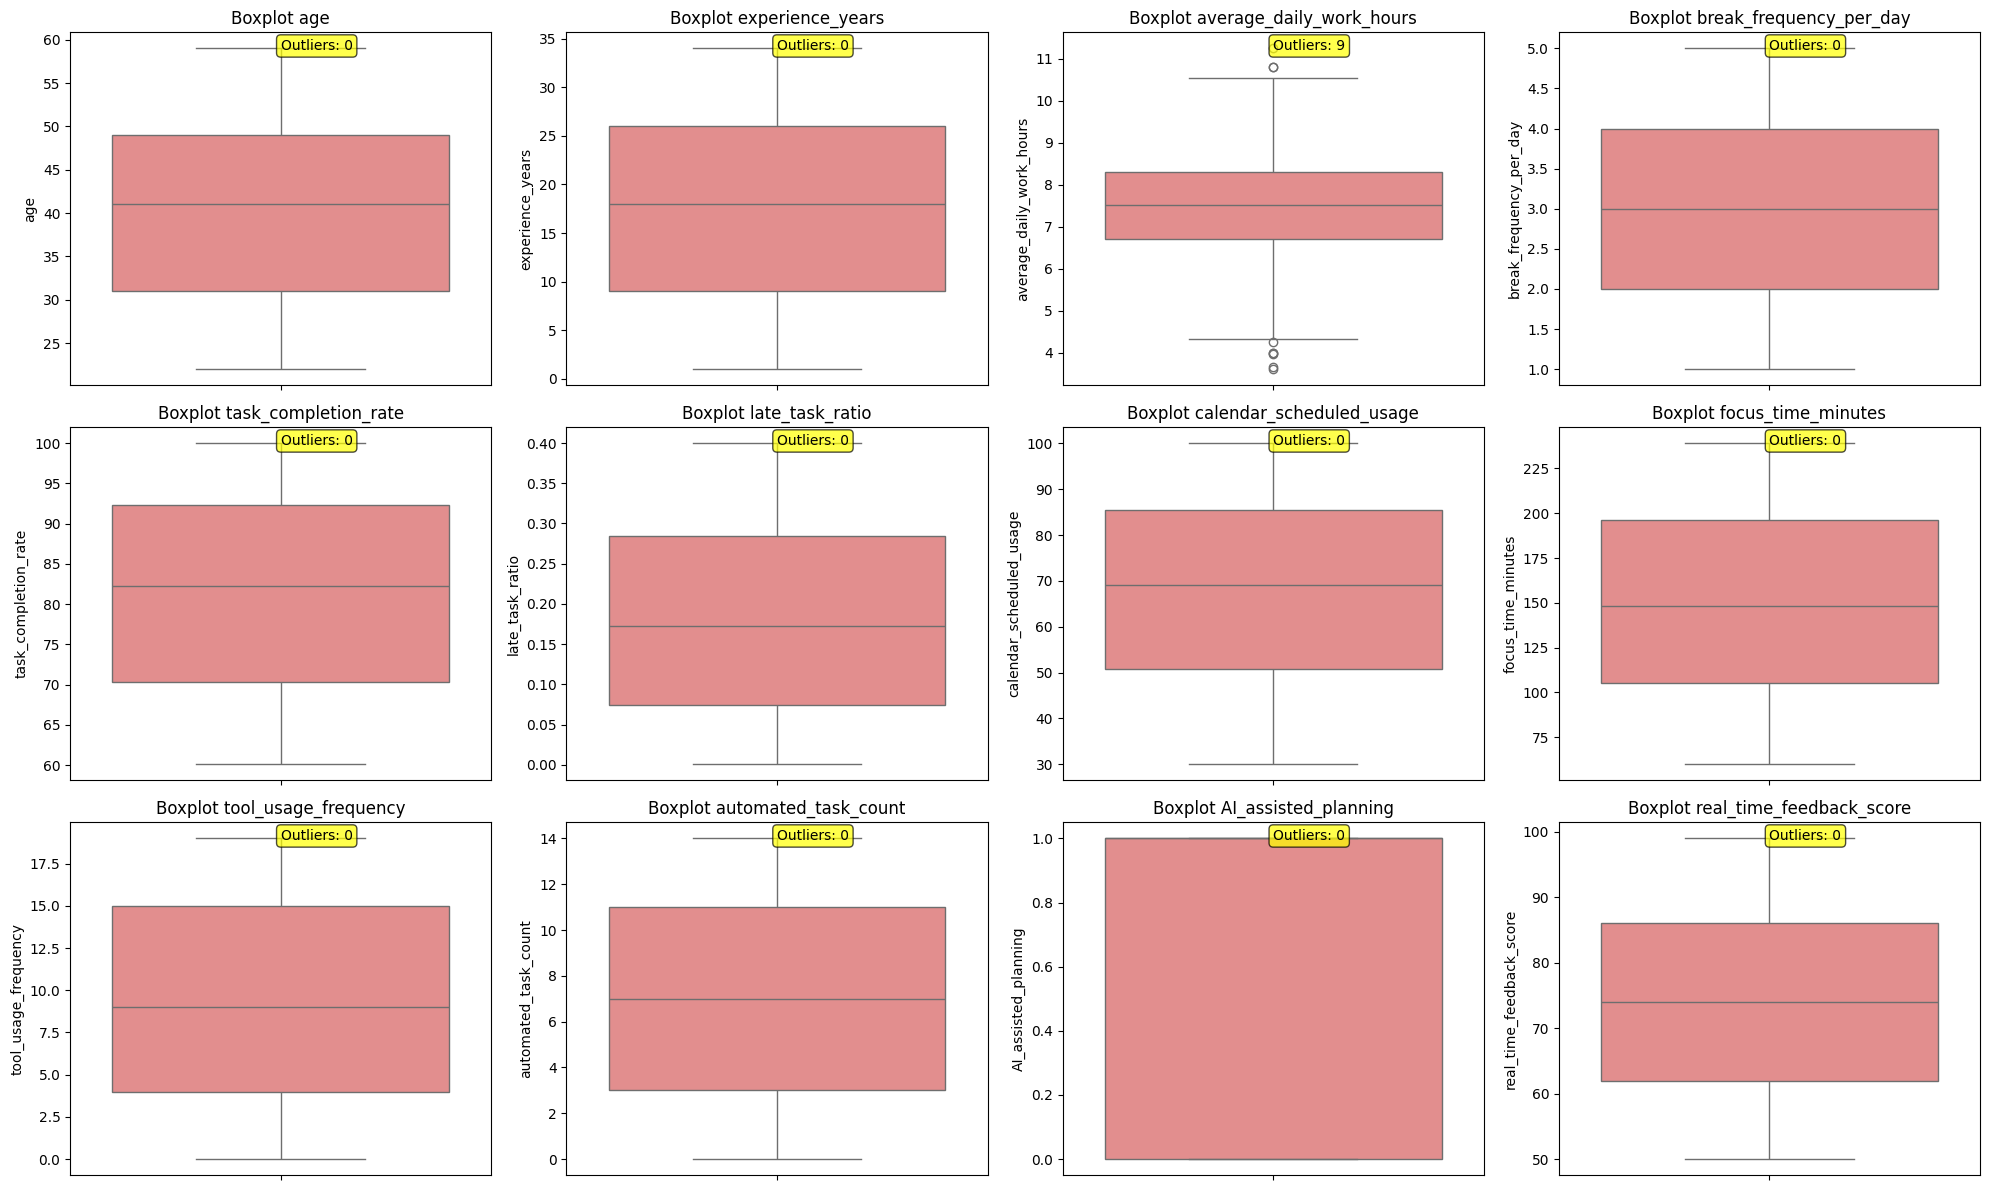


RINGKASAN OUTLIERS:
age: 0 outliers (0.00%)
experience_years: 0 outliers (0.00%)
average_daily_work_hours: 9 outliers (0.90%)
break_frequency_per_day: 0 outliers (0.00%)
task_completion_rate: 0 outliers (0.00%)
late_task_ratio: 0 outliers (0.00%)
calendar_scheduled_usage: 0 outliers (0.00%)
focus_time_minutes: 0 outliers (0.00%)
tool_usage_frequency: 0 outliers (0.00%)
automated_task_count: 0 outliers (0.00%)
AI_assisted_planning: 0 outliers (0.00%)
real_time_feedback_score: 0 outliers (0.00%)


In [ ]:
# VISUALISASI FITUR NUMERIK - BOXPLOT (Deteksi Outliers)
print("BOXPLOT FITUR NUMERIK (Deteksi Outliers):")

plt.figure(figsize=(20, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.title(f'Boxplot {feature}')

    # Hitung dan tampilkan outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
    plt.text(0.5, 0.95, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.show()

# Ringkasan outliers
print("\nRINGKASAN OUTLIERS:")
for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    print(f"{feature}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

ANALISIS FITUR NUMERIK VS LABEL:


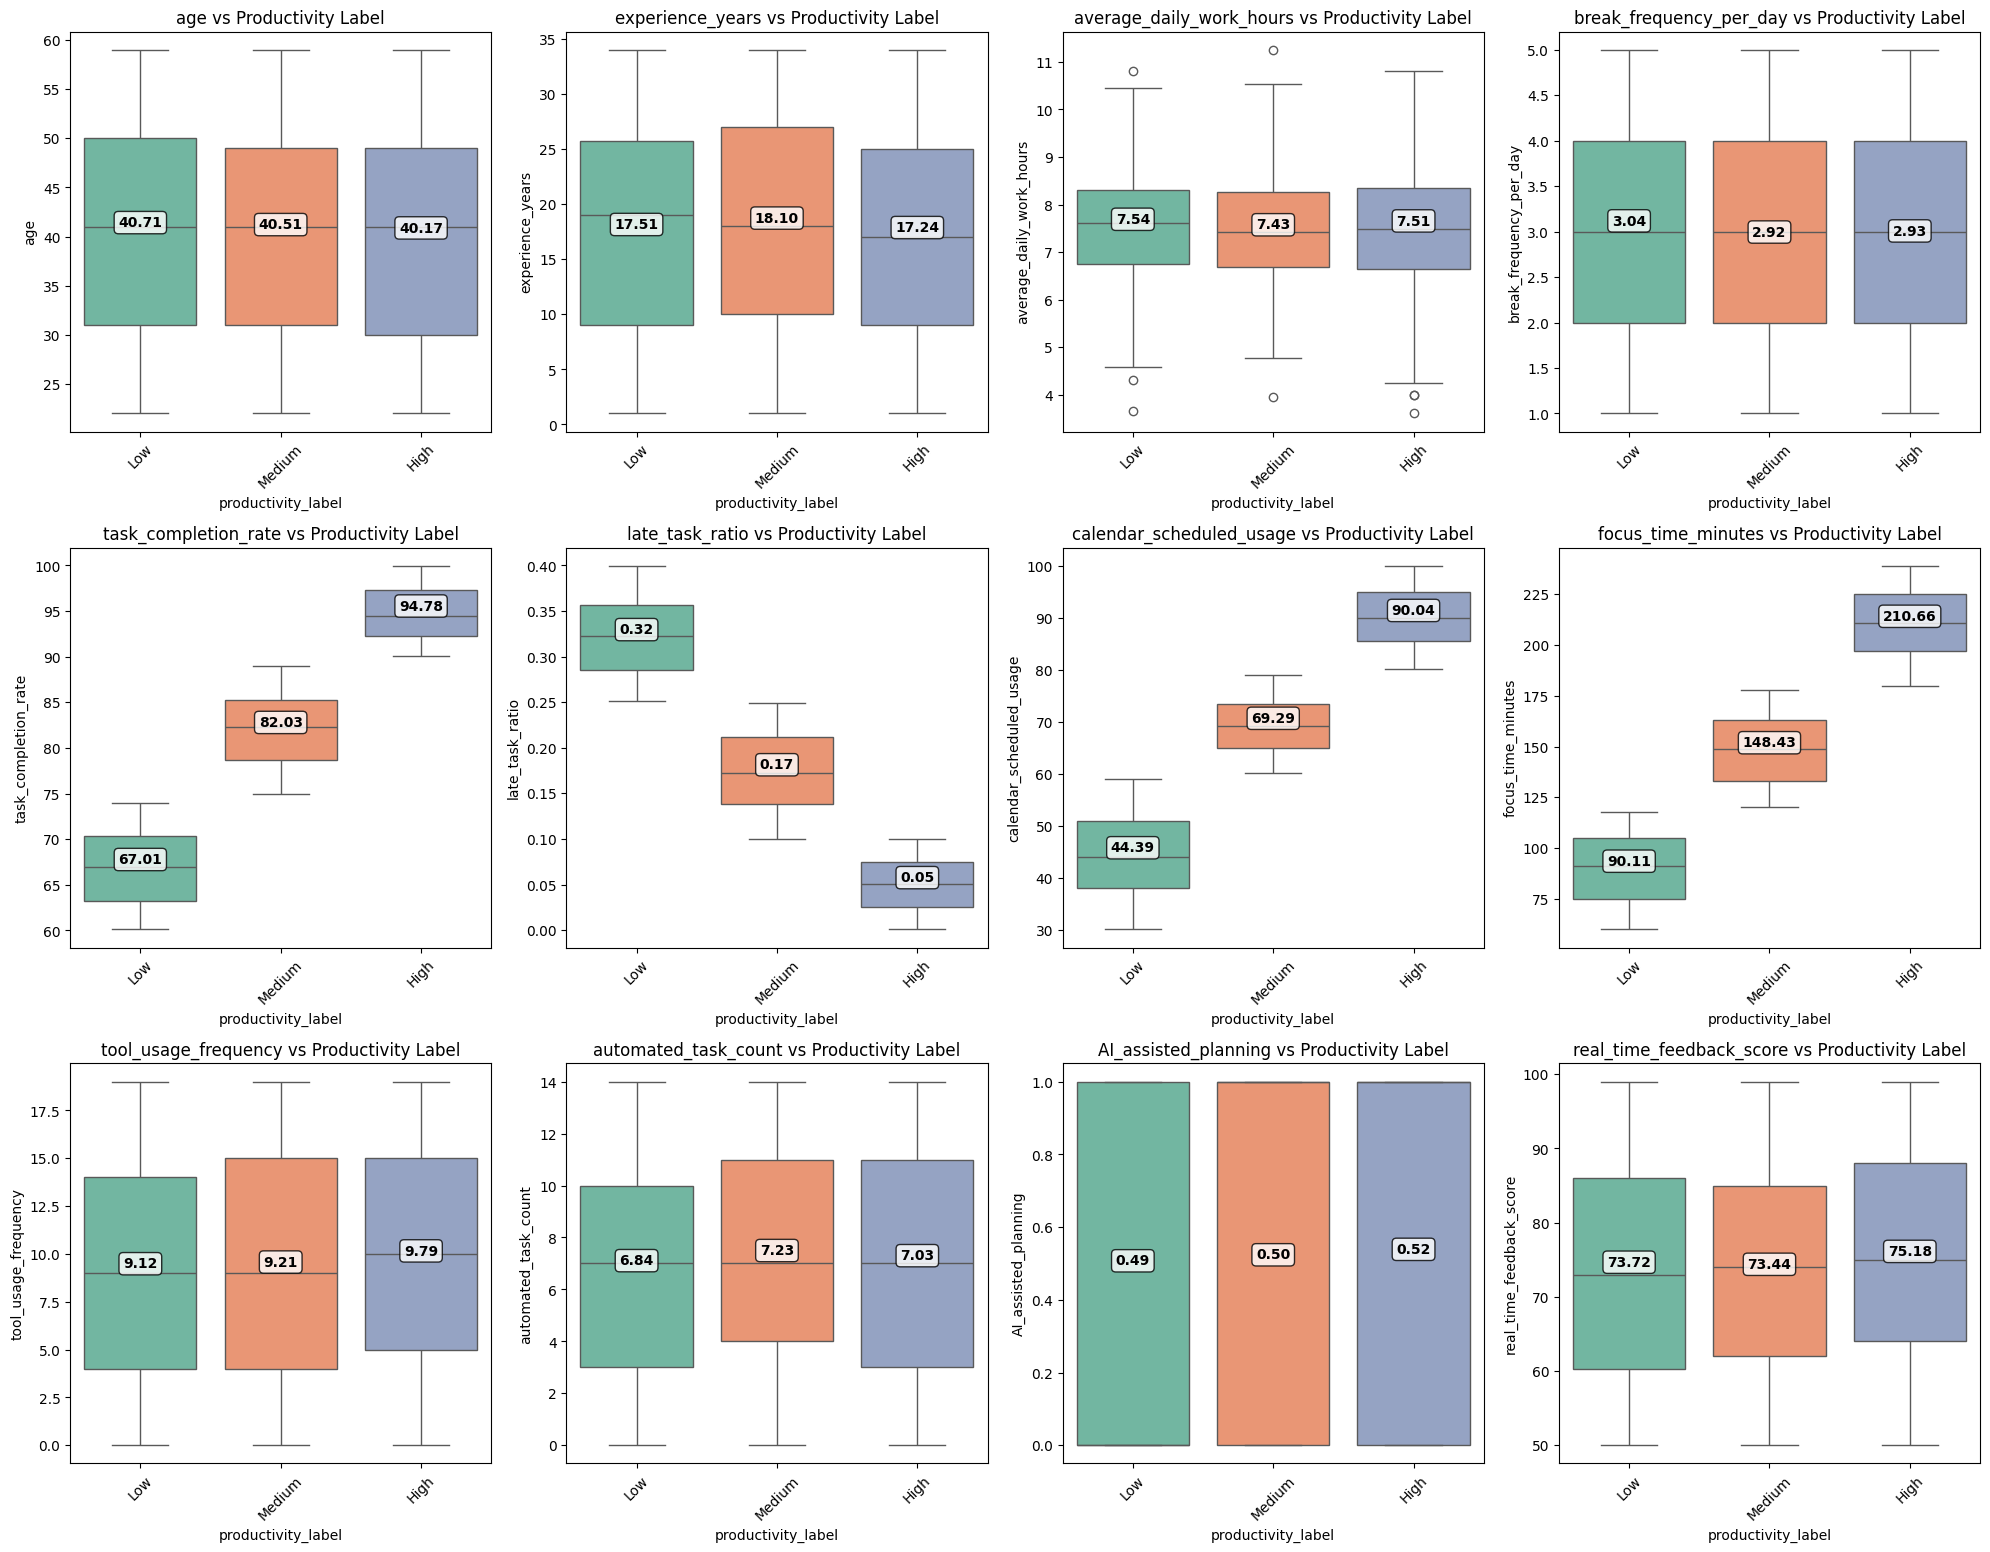

In [ ]:
# ANALISIS FITUR NUMERIK VS LABEL
print("ANALISIS FITUR NUMERIK VS LABEL:")

plt.figure(figsize=(20, 20))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='productivity_label', y=feature, palette='Set2')
    plt.title(f'{feature} vs Productivity Label')
    plt.xticks(rotation=45)

    # Tambahkan mean untuk setiap kategori
    for j, label in enumerate(df['productivity_label'].unique()):
        mean_val = df[df['productivity_label'] == label][feature].mean()
        plt.text(j, mean_val, f'{mean_val:.2f}', ha='center', va='bottom',
                fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

ANALISIS KORELASI FITUR NUMERIK:
Matriks Korelasi:
                            age  experience_years  average_daily_work_hours  \
age                       1.000             0.009                    -0.035   
experience_years          0.009             1.000                    -0.014   
average_daily_work_hours -0.035            -0.014                     1.000   
break_frequency_per_day  -0.010             0.041                    -0.019   
task_completion_rate     -0.020             0.010                    -0.009   
late_task_ratio           0.016             0.024                     0.022   
calendar_scheduled_usage -0.035            -0.006                    -0.020   
focus_time_minutes       -0.020             0.006                    -0.008   
tool_usage_frequency     -0.008            -0.002                     0.007   
automated_task_count     -0.021             0.036                    -0.033   
AI_assisted_planning      0.033             0.095                     0.026   
r

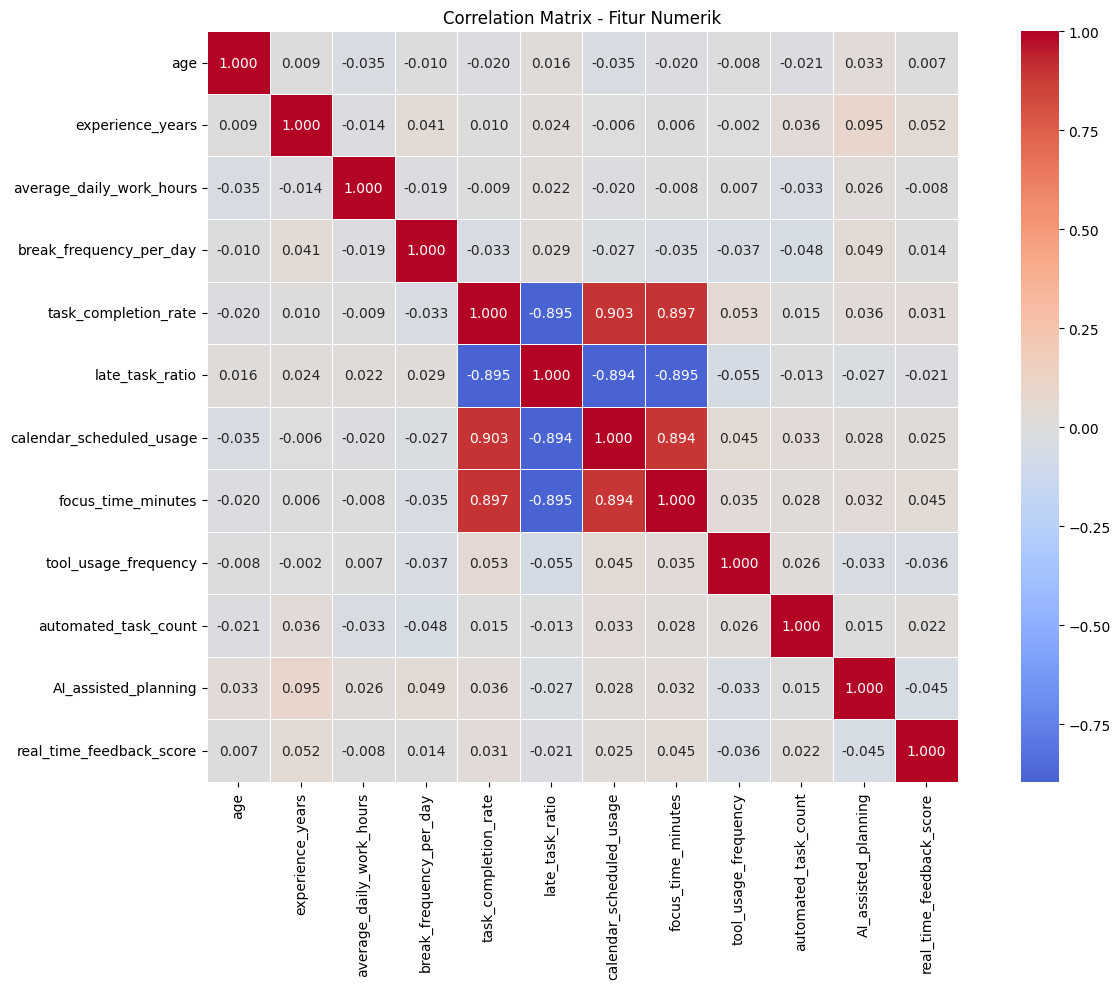


KORELASI TINGGI (|r| > 0.7):
task_completion_rate vs late_task_ratio: -0.895
task_completion_rate vs calendar_scheduled_usage: 0.903
task_completion_rate vs focus_time_minutes: 0.897
late_task_ratio vs calendar_scheduled_usage: -0.894
late_task_ratio vs focus_time_minutes: -0.895
calendar_scheduled_usage vs focus_time_minutes: 0.894


In [ ]:
# CEK KORELASI (Fitur Numerik)
print("ANALISIS KORELASI FITUR NUMERIK:")
correlation_matrix = df[numeric_features].corr()
print("Matriks Korelasi:")
print(correlation_matrix.round(3))

# Heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.3f')
plt.title('Correlation Matrix - Fitur Numerik')
plt.tight_layout()
plt.show()

# Identifikasi korelasi tinggi
print("\nKORELASI TINGGI (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j],
                                  corr_val))
            print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {corr_val:.3f}")

if not high_corr_pairs:
    print("Tidak ada korelasi tinggi yang mengkhawatirkan")

In [ ]:
# CEK FITUR KATEGORIK
print("ANALISIS FITUR KATEGORIK:")

categorical_features = ['location_type', 'industry_sector', 'productivity_label']

for feature in categorical_features:
    print(f"\n--- {feature.upper()} ---")
    value_counts = df[feature].value_counts()
    print("Value counts:")
    print(value_counts)
    print(f"\nPersentase:")
    print((value_counts / len(df) * 100).round(2))

    if feature != 'productivity_label':  # Skip target variable
        print(f"\nCrosstab dengan productivity_label:")
        crosstab = pd.crosstab(df[feature], df['productivity_label'], margins=True)
        print(crosstab)

        # Persentase dalam setiap kategori
        crosstab_pct = pd.crosstab(df[feature], df['productivity_label'], normalize='index') * 100
        print(f"\nPersentase dalam setiap {feature}:")
        print(crosstab_pct.round(2))

ANALISIS FITUR KATEGORIK:

--- LOCATION_TYPE ---
Value counts:
location_type
City       355
Town       326
Village    319
Name: count, dtype: int64

Persentase:
location_type
City       35.5
Town       32.6
Village    31.9
Name: count, dtype: float64

Crosstab dengan productivity_label:
productivity_label  High  Low  Medium   All
location_type                              
City                 131  110     114   355
Town                 102  118     106   326
Village              100  106     113   319
All                  333  334     333  1000

Persentase dalam setiap location_type:
productivity_label   High    Low  Medium
location_type                           
City                36.90  30.99   32.11
Town                31.29  36.20   32.52
Village             31.35  33.23   35.42

--- INDUSTRY_SECTOR ---
Value counts:
industry_sector
Retail        203
IT            203
Education     203
Healthcare    199
Finance       192
Name: count, dtype: int64

Persentase:
industry_sector
Ret

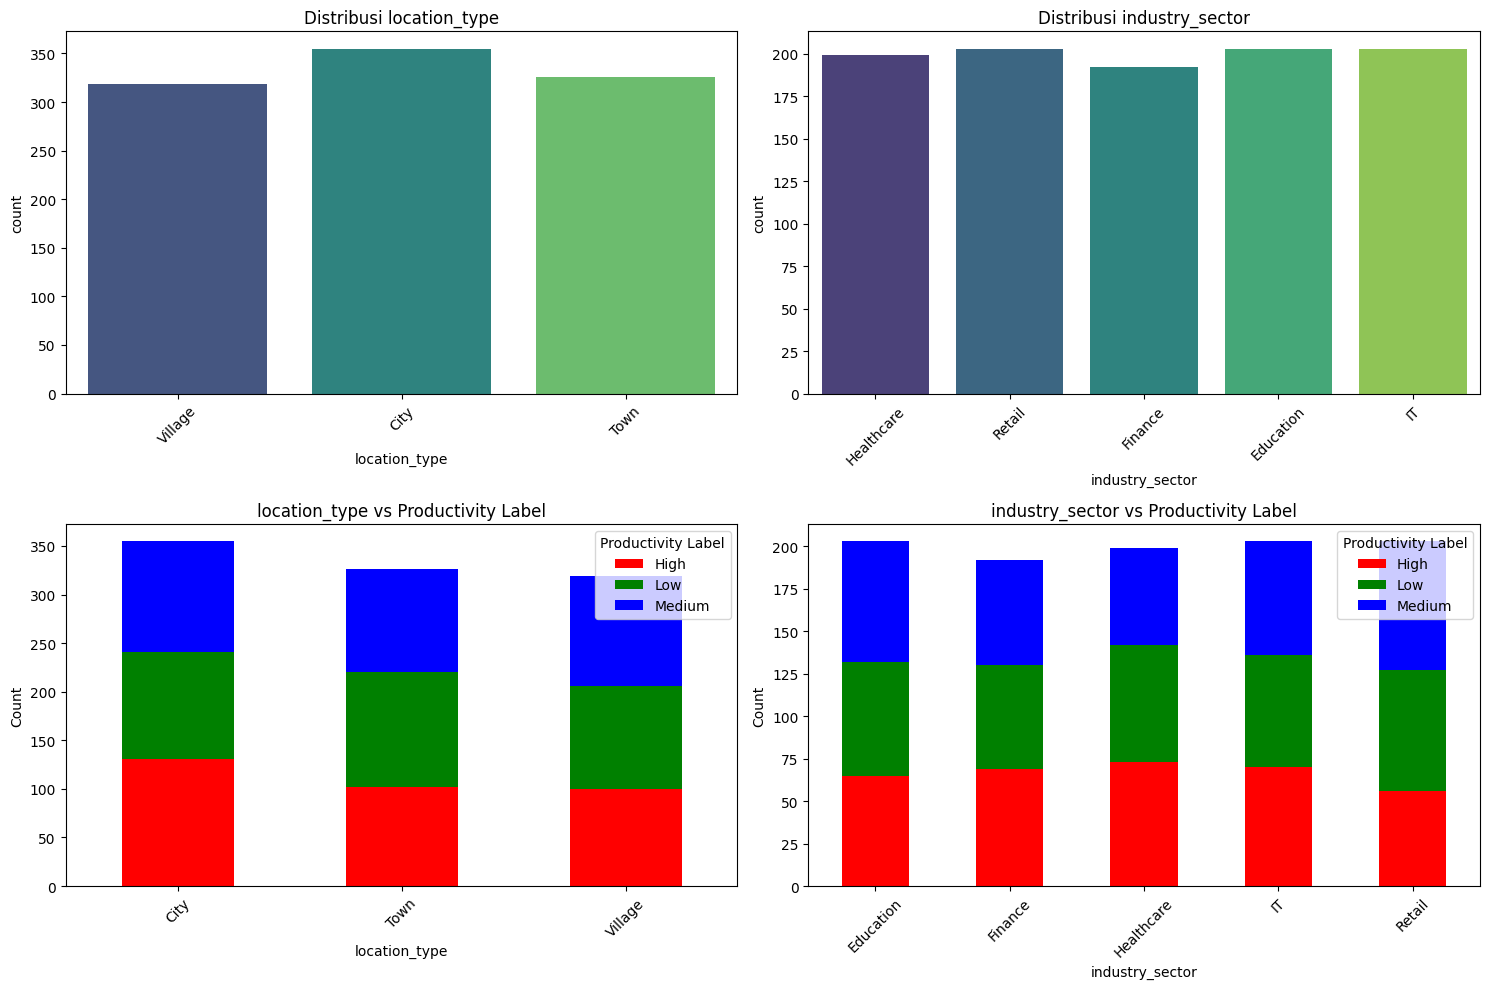

In [ ]:
# VISUALISASI FITUR KATEGORIK
categorical_features = ['location_type', 'industry_sector']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    # Count plot
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)

    # Stacked bar plot dengan productivity_label
    plt.subplot(2, 2, i+2)
    crosstab = pd.crosstab(df[feature], df['productivity_label'])
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(),
                  color=['red', 'green', 'blue'])
    plt.title(f'{feature} vs Productivity Label')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Productivity Label')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
print("DATA PREPROCESSING")
print("="*60)

# Simpan dataset asli untuk referensi
df_original = df.copy()
print(f"Dataset asli shape: {df_original.shape}")

# HAPUS KOLOM YANG TIDAK DIPERLUKAN
print("\nHAPUS KOLOM YANG TIDAK DIPERLUKAN:")
columns_to_drop = ['worker_id', 'productivity_score']

print(f"Kolom yang akan dihapus: {columns_to_drop}")
for col in columns_to_drop:
    if col in df.columns:
        print(f"  - {col}: {df[col].dtype}")
    else:
        print(f"  - {col}: TIDAK DITEMUKAN")

# Hapus kolom
df_clean = df.drop(columns=columns_to_drop, errors='ignore')
print(f"\nDataset shape setelah menghapus kolom: {df_clean.shape}")
print(f"Kolom tersisa: {list(df_clean.columns)}")

DATA PREPROCESSING
Dataset asli shape: (1000, 17)

HAPUS KOLOM YANG TIDAK DIPERLUKAN:
Kolom yang akan dihapus: ['worker_id', 'productivity_score']
  - worker_id: object
  - productivity_score: float64

Dataset shape setelah menghapus kolom: (1000, 15)
Kolom tersisa: ['location_type', 'industry_sector', 'age', 'experience_years', 'average_daily_work_hours', 'break_frequency_per_day', 'task_completion_rate', 'late_task_ratio', 'calendar_scheduled_usage', 'focus_time_minutes', 'tool_usage_frequency', 'automated_task_count', 'AI_assisted_planning', 'real_time_feedback_score', 'productivity_label']


In [ ]:
# ENCODE FITUR KATEGORIK (One-hot Encoding)
print("\nENCODE FITUR KATEGORIK:")
print("="*60)

# Identifikasi fitur kategorik (exclude target)
categorical_features = ['location_type', 'industry_sector']
print(f"Fitur kategorik untuk encoding: {categorical_features}")

# Tampilkan unique values sebelum encoding
for feature in categorical_features:
    print(f"\n{feature} unique values: {df_clean[feature].unique()}")
    print(f"Jumlah unique values: {len(df_clean[feature].unique())}")

# One-hot encoding
df_encoded = pd.get_dummies(df_clean, columns=categorical_features, prefix=categorical_features)

print(f"\nDataset shape setelah one-hot encoding: {df_encoded.shape}")
print(f"Jumlah kolom bertambah dari {df_clean.shape[1]} menjadi {df_encoded.shape[1]}")

# Tampilkan kolom baru yang terbentuk
new_columns = [col for col in df_encoded.columns if col not in df_clean.columns]
print(f"\nKolom baru hasil encoding ({len(new_columns)} kolom):")
for col in new_columns:
    print(f"  - {col}")

print(f"\nKolom dataset setelah encoding: {list(df_encoded.columns)}")


ENCODE FITUR KATEGORIK:
Fitur kategorik untuk encoding: ['location_type', 'industry_sector']

location_type unique values: ['Village' 'City' 'Town']
Jumlah unique values: 3

industry_sector unique values: ['Healthcare' 'Retail' 'Finance' 'Education' 'IT']
Jumlah unique values: 5

Dataset shape setelah one-hot encoding: (1000, 21)
Jumlah kolom bertambah dari 15 menjadi 21

Kolom baru hasil encoding (8 kolom):
  - location_type_City
  - location_type_Town
  - location_type_Village
  - industry_sector_Education
  - industry_sector_Finance
  - industry_sector_Healthcare
  - industry_sector_IT
  - industry_sector_Retail

Kolom dataset setelah encoding: ['age', 'experience_years', 'average_daily_work_hours', 'break_frequency_per_day', 'task_completion_rate', 'late_task_ratio', 'calendar_scheduled_usage', 'focus_time_minutes', 'tool_usage_frequency', 'automated_task_count', 'AI_assisted_planning', 'real_time_feedback_score', 'productivity_label', 'location_type_City', 'location_type_Town', '

In [ ]:
# ENCODE TARGET LABEL
print("ENCODE TARGET LABEL")
print("="*60)

# Lihat distribusi label sebelum encoding
print("Distribusi label sebelum encoding:")
label_counts = df_encoded['productivity_label'].value_counts()
print(label_counts)
print(f"\nPersentase distribusi:")
print((label_counts / len(df_encoded) * 100).round(2))

# Label encoding untuk target
label_encoder = LabelEncoder()
df_encoded['productivity_label_encoded'] = label_encoder.fit_transform(df_encoded['productivity_label'])

# Mapping label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"\nLabel mapping: {label_mapping}")

# Verifikasi encoding
print("\nDistribusi label setelah encoding:")
encoded_counts = df_encoded['productivity_label_encoded'].value_counts().sort_index()
print(encoded_counts)

# Tampilkan mapping detail
print(f"\nLabel classes detail:")
for i, class_name in enumerate(label_encoder.classes_):
    count = encoded_counts[i]
    percentage = (count / len(df_encoded) * 100)
    print(f"  {class_name} -> {i}: {count} samples ({percentage:.2f}%)")

# Hapus kolom label asli
df_encoded = df_encoded.drop('productivity_label', axis=1)
print(f"\nDataset shape setelah menghapus label asli: {df_encoded.shape}")
print(f"Target column: productivity_label_encoded")

ENCODE TARGET LABEL
Distribusi label sebelum encoding:
productivity_label
Low       334
Medium    333
High      333
Name: count, dtype: int64

Persentase distribusi:
productivity_label
Low       33.4
Medium    33.3
High      33.3
Name: count, dtype: float64

Label mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}

Distribusi label setelah encoding:
productivity_label_encoded
0    333
1    334
2    333
Name: count, dtype: int64

Label classes detail:
  High -> 0: 333 samples (33.30%)
  Low -> 1: 334 samples (33.40%)
  Medium -> 2: 333 samples (33.30%)

Dataset shape setelah menghapus label asli: (1000, 21)
Target column: productivity_label_encoded


In [ ]:
# SPLIT DATA (TRAIN, VALIDATION, TEST)
print("SPLIT DATA (TRAIN, VALIDATION, TEST)")
print("="*60)

# Pisahkan fitur dan target
X = df_encoded.drop('productivity_label_encoded', axis=1)
y = df_encoded['productivity_label_encoded']

print(f"Fitur (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Nama fitur: {list(X.columns)}")

# Cek distribusi target sebelum split
print(f"\nDistribusi target sebelum split:")
target_dist = y.value_counts().sort_index()
print(target_dist)
print(f"Persentase:")
for idx, count in target_dist.items():
    class_name = label_encoder.classes_[idx]
    percentage = (count / len(y) * 100)
    print(f"  {class_name} ({idx}): {count} samples ({percentage:.2f}%)")

# Split pertama: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mempertahankan proporsi kelas
)

# Split kedua: dari 80% -> 64% train, 16% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.2,  # 20% dari 80% = 16% dari total
    random_state=42,
    stratify=y_temp
)

print(f"\nPembagian data:")
print(f"  Training set  : {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set      : {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"  Total         : {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

# Verifikasi proporsi kelas tetap terjaga
print(f"\nVerifikasi proporsi kelas:")
datasets = [
    ('Original', y),
    ('Train', y_train),
    ('Validation', y_val),
    ('Test', y_test)
]

for name, dataset in datasets:
    print(f"\n{name} set distribution:")
    dist = dataset.value_counts().sort_index()
    for idx, count in dist.items():
        class_name = label_encoder.classes_[idx]
        percentage = (count / len(dataset) * 100)
        print(f"  {class_name} ({idx}): {count} ({percentage:.1f}%)")

SPLIT DATA (TRAIN, VALIDATION, TEST)
Fitur (X) shape: (1000, 20)
Target (y) shape: (1000,)
Nama fitur: ['age', 'experience_years', 'average_daily_work_hours', 'break_frequency_per_day', 'task_completion_rate', 'late_task_ratio', 'calendar_scheduled_usage', 'focus_time_minutes', 'tool_usage_frequency', 'automated_task_count', 'AI_assisted_planning', 'real_time_feedback_score', 'location_type_City', 'location_type_Town', 'location_type_Village', 'industry_sector_Education', 'industry_sector_Finance', 'industry_sector_Healthcare', 'industry_sector_IT', 'industry_sector_Retail']

Distribusi target sebelum split:
productivity_label_encoded
0    333
1    334
2    333
Name: count, dtype: int64
Persentase:
  High (0): 333 samples (33.30%)
  Low (1): 334 samples (33.40%)
  Medium (2): 333 samples (33.30%)

Pembagian data:
  Training set  : 640 samples (64.0%)
  Validation set: 160 samples (16.0%)
  Test set      : 200 samples (20.0%)
  Total         : 1000 samples

Verifikasi proporsi kelas:

O

In [ ]:
# FEATURE SCALING
print("FEATURE SCALING")
print("="*60)

# Inisialisasi scaler
scaler = StandardScaler()

print("Menggunakan StandardScaler untuk normalisasi fitur")
print("Formula: z = (x - mean) / std")

# Fit scaler pada training data dan transform semua set
print(f"\nSebelum scaling:")
print(f"Train data range - Min: {X_train.min().min():.3f}, Max: {X_train.max().max():.3f}")
print(f"Train data mean: {X_train.mean().mean():.3f}, std: {X_train.std().mean():.3f}")

# Fit dan transform
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk kemudahan
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"\nSetelah scaling:")
print(f"Train data range - Min: {X_train_scaled.min().min():.3f}, Max: {X_train_scaled.max().max():.3f}")
print(f"Train data mean: {X_train_scaled.mean().mean():.3f}, std: {X_train_scaled.std().mean():.3f}")

# Tampilkan statistik scaling untuk beberapa kolom pertama
print(f"\nContoh scaling untuk 5 fitur pertama:")
feature_sample = X_train.columns[:5]
for feature in feature_sample:
    orig_mean = X_train[feature].mean()
    orig_std = X_train[feature].std()
    scaled_mean = X_train_scaled[feature].mean()
    scaled_std = X_train_scaled[feature].std()
    print(f"{feature}:")
    print(f"  Original - Mean: {orig_mean:.3f}, Std: {orig_std:.3f}")
    print(f"  Scaled   - Mean: {scaled_mean:.3f}, Std: {scaled_std:.3f}")

print(f"\n  Feature scaling selesai!")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Validation set scaled shape: {X_val_scaled.shape}")
print(f"Test set scaled shape: {X_test_scaled.shape}")

FEATURE SCALING
Menggunakan StandardScaler untuk normalisasi fitur
Formula: z = (x - mean) / std

Sebelum scaling:
Train data range - Min: 0.000, Max: 239.000
Train data mean: 23.028, std: 6.757

Setelah scaling:
Train data range - Min: -3.261, Max: 3.115
Train data mean: 0.000, std: 1.001

Contoh scaling untuk 5 fitur pertama:
age:
  Original - Mean: 40.519, Std: 10.810
  Scaled   - Mean: 0.000, Std: 1.001
experience_years:
  Original - Mean: 17.433, Std: 9.718
  Scaled   - Mean: -0.000, Std: 1.001
average_daily_work_hours:
  Original - Mean: 7.517, Std: 1.199
  Scaled   - Mean: -0.000, Std: 1.001
break_frequency_per_day:
  Original - Mean: 2.980, Std: 1.421
  Scaled   - Mean: 0.000, Std: 1.001
task_completion_rate:
  Original - Mean: 81.366, Std: 11.835
  Scaled   - Mean: -0.000, Std: 1.001

  Feature scaling selesai!
Training set scaled shape: (640, 20)
Validation set scaled shape: (160, 20)
Test set scaled shape: (200, 20)


In [ ]:
# SAVE FINAL PROCESSED DATA
print("SAVE PREPROCESSED DATA")
print("="*60)

# Import joblib untuk save objects
import joblib
import json

# 1. Simpan data yang sudah di-split dan di-scale
print("  Menyimpan dataset yang sudah diproses:")

# Training data
train_data = pd.concat([X_train_scaled, y_train], axis=1)
train_data.to_csv('data_train.csv', index=False)
print(f"   Training data disimpan ke 'data_train.csv' - Shape: {train_data.shape}")

# Validation data
val_data = pd.concat([X_val_scaled, y_val], axis=1)
val_data.to_csv('data_validation.csv', index=False)
print(f"   Validation data disimpan ke 'data_validation.csv' - Shape: {val_data.shape}")

# Test data
test_data = pd.concat([X_test_scaled, y_test], axis=1)
test_data.to_csv('data_test.csv', index=False)
print(f"   Test data disimpan ke 'data_test.csv' - Shape: {test_data.shape}")

# 2. Simpan data sebelum scaling (untuk backup)
print(f"\n   Menyimpan dataset sebelum scaling:")
train_unscaled = pd.concat([X_train, y_train], axis=1)
train_unscaled.to_csv('data_train_unscaled.csv', index=False)
print(f"   Training data (unscaled) disimpan ke 'data_train_unscaled.csv'")

# 3. Simpan objects preprocessing
print(f"\n   Menyimpan preprocessing objects:")

# Simpan label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')
print(f"   Label encoder disimpan ke 'label_encoder.pkl'")

# Simpan scaler
joblib.dump(scaler, 'feature_scaler.pkl')
print(f"   Feature scaler disimpan ke 'feature_scaler.pkl'")

# 4. Simpan mapping dan info untuk referensi
print(f"\n   Menyimpan informasi referensi:")

# Label mapping
label_mapping_df = pd.DataFrame({
    'original_label': label_encoder.classes_,
    'encoded_label': range(len(label_encoder.classes_))
})
label_mapping_df.to_csv('label_mapping.csv', index=False)
print(f"   Label mapping disimpan ke 'label_mapping.csv'")
print("Label mapping:")
print(label_mapping_df)

# Feature names
feature_info = pd.DataFrame({
    'feature_name': X_train.columns,
    'feature_index': range(len(X_train.columns))
})
feature_info.to_csv('feature_names.csv', index=False)
print(f"   Feature names disimpan ke 'feature_names.csv'")

# Preprocessing summary
preprocessing_summary = {
    'original_shape': [int(x) for x in df_original.shape],
    'final_shape': [int(x) for x in df_encoded.shape],
    'train_shape': [int(x) for x in X_train_scaled.shape],
    'val_shape': [int(x) for x in X_val_scaled.shape],
    'test_shape': [int(x) for x in X_test_scaled.shape],
    'columns_dropped': columns_to_drop,
    'categorical_features_encoded': categorical_features,
    'num_features': int(X_train_scaled.shape[1]),
    'num_classes': int(len(label_encoder.classes_)),
    'label_classes': [str(x) for x in label_encoder.classes_],
    'label_mapping': {str(k): int(v) for k, v in label_mapping.items()},
    'scaling_method': 'StandardScaler',
    'split_ratio': {
        'train': f"{X_train.shape[0]/len(X)*100:.1f}%",
        'validation': f"{X_val.shape[0]/len(X)*100:.1f}%",
        'test': f"{X_test.shape[0]/len(X)*100:.1f}%"
    }
}

with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)
print(f"   Preprocessing summary disimpan ke 'preprocessing_summary.json'")

print(f"\n   PREPROCESSING SELESAI!")
print(f"="*60)
print(f"   RINGKASAN:")
print(f"   • Original dataset: {df_original.shape}")
print(f"   • Processed dataset: {df_encoded.shape}")
print(f"   • Training set: {X_train_scaled.shape}")
print(f"   • Validation set: {X_val_scaled.shape}")
print(f"   • Test set: {X_test_scaled.shape}")
print(f"   • Total features: {X_train_scaled.shape[1]}")
print(f"   • Total classes: {len(label_encoder.classes_)}")
print(f"   • Files saved: 10 files")
print(f"\n   Data siap untuk modeling!")

SAVE PREPROCESSED DATA
  Menyimpan dataset yang sudah diproses:
   Training data disimpan ke 'data_train.csv' - Shape: (640, 21)
   Validation data disimpan ke 'data_validation.csv' - Shape: (160, 21)
   Test data disimpan ke 'data_test.csv' - Shape: (200, 21)

   Menyimpan dataset sebelum scaling:
   Training data (unscaled) disimpan ke 'data_train_unscaled.csv'

   Menyimpan preprocessing objects:
   Label encoder disimpan ke 'label_encoder.pkl'
   Feature scaler disimpan ke 'feature_scaler.pkl'

   Menyimpan informasi referensi:
   Label mapping disimpan ke 'label_mapping.csv'
Label mapping:
  original_label  encoded_label
0           High              0
1            Low              1
2         Medium              2
   Feature names disimpan ke 'feature_names.csv'
   Preprocessing summary disimpan ke 'preprocessing_summary.json'

   PREPROCESSING SELESAI!
   RINGKASAN:
   • Original dataset: (1000, 17)
   • Processed dataset: (1000, 21)
   • Training set: (640, 20)
   • Validation 